In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import os
from functools import partial
from tqdm import tqdm_notebook
import numpy as np
import scipy

%matplotlib inline

In [2]:
from distance_analysis_utils.generation import *
from distance_analysis_utils.embeddings import *
from distance_analysis_utils.analysis import *

# Artificial datasets generation

**Clicks(d)** - contains d graphs, $\{ G_1, \ldots, G_{d} \}$, where $G_i$ is a click of size $i$ united with $d - i$ isolated vertices.

**RandomEdgesRemoval(d)** - contains $\frac{d (d - 1)}{2}$ graphs $\{ G_1, \ldots, G_{\frac{d (d - 1)}{2}} \}$, $G_i$ is received by removing an edge from $G_{i - 1}$ with equal probabilities for each of the edges.

**RandomMEdges(d, m)** - contains $\frac{d (d - 1)}{2}$ graphs $\{ G_1, \ldots, G_{\frac{d (d - 1)}{2}} \}$, $G_i$ is received by removing an edge from $G_{i - 1}$ with equal probabilities for each of the edges.

# AWE embeddings

In [3]:
from AnonymousWalkKernel import GraphKernel

ModuleNotFoundError: No module named 'AnonymousWalkKernel'

In [4]:
def getAWEEmbeddings(folder, length):
    gk = GraphKernel()
    gk.read_graphs(folder = folder, ext = 'graphml')
    gk.embed_graphs(steps = length, keep_last=True)
    return gk.embeddings

# AWE Embeddings

## Tiny-tiny datasets hypothesis testing

## Clicks10

In [29]:
createClicks(d=10)
clicksData = generateClicks(d=10)

Getting embeddings...
Using exact method to get graph embeddings
Dimension size: 5
Processing 0 graph
Getting graph distances...



Getting embed distances...



1: upper bound errs - 9, low bound errs - 0)
100: upper bound errs - 2, low bound errs - 0)
200: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [200]


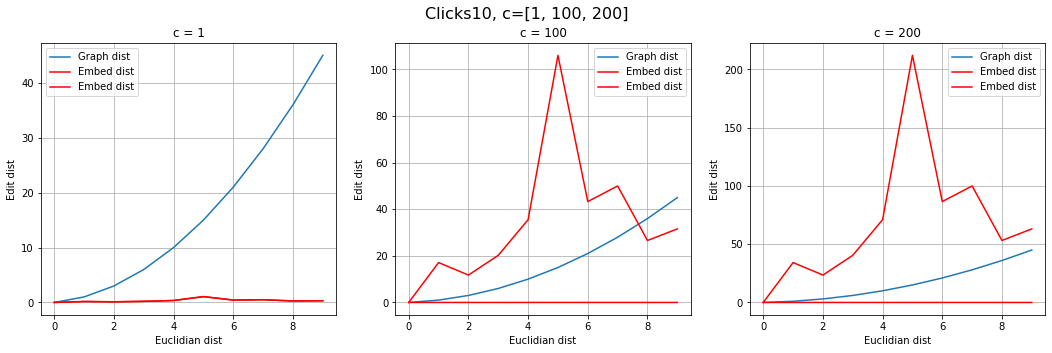

In [30]:
graph_distances_10, embed_distances_10 = AWEEmbedsEndToEnd('Clicks10', clicksData,
                                                           nx.algorithms.similarity.graph_edit_distance,
                                                           scipy.spatial.distance.euclidean,
                                                           cs=[1, 100, 200])

In [31]:
find_c(graph_distances_10, embed_distances_10, 200)

Optimal c in approx 143.0


142.96875000028518

## RER10

In [32]:
createRER(d=10)
RERData = generateRandomEdgeRemoval(d=10)

Getting embeddings...
Using exact method to get graph embeddings
Dimension size: 5
Processing 0 graph
Processing 10 graph
Processing 20 graph
Processing 30 graph
Processing 40 graph
Getting graph distances...



Getting embed distances...



100: upper bound errs - 27, low bound errs - 0)
1000: upper bound errs - 1, low bound errs - 0)
2000: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [2000]


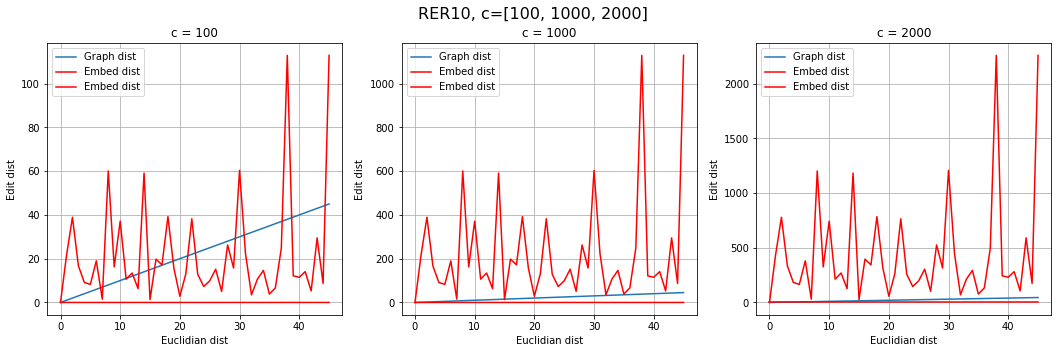

In [33]:
graph_distances_10, embed_distances_10 = AWEEmbedsEndToEnd('RER10', RERData,
                                                           nx.algorithms.similarity.graph_edit_distance,
                                                           scipy.spatial.distance.euclidean,
                                                           cs=[100, 1000, 2000])

In [34]:
find_c(graph_distances_10, embed_distances_10, 2000)

Optimal c in approx 1131.0


1130.8593750004347

# GNMs

In [35]:
createGNM(d=10, n=10, m=5)
GNMData = generateRandomGNMs(d=10, n=10, m=5)

Getting embeddings...
Using exact method to get graph embeddings
Dimension size: 5
Processing 0 graph
Processing 10 graph
Processing 20 graph
Processing 30 graph
Processing 40 graph
Getting graph distances...



Getting embed distances...



100: upper bound errs - 27, low bound errs - 0)
1000: upper bound errs - 1, low bound errs - 0)
2000: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [2000]


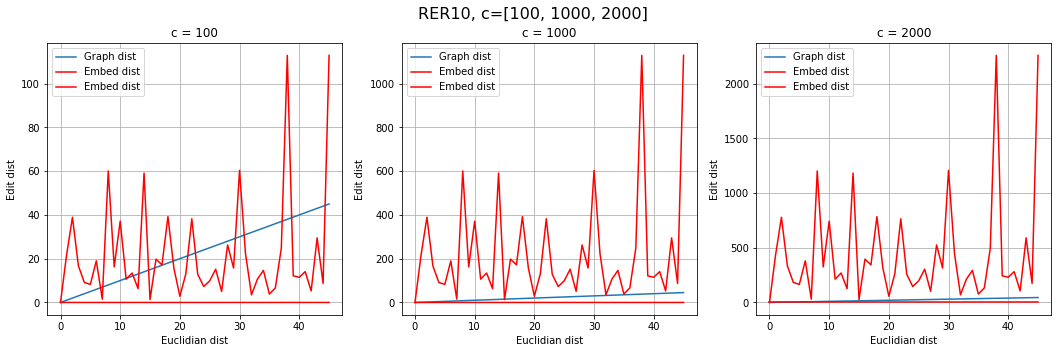

In [36]:
graph_distances_10, embed_distances_10 = AWEEmbedsEndToEnd('RER10', RERData,
                                                           nx.algorithms.similarity.graph_edit_distance,
                                                           scipy.spatial.distance.euclidean,
                                                           cs=[100, 1000, 2000])

## AWE: Larger artificial datasets/AWE-length$\approx$5

## Clicks50

In [40]:
createClicks(d=50)
clicksData = generateClicks(d=50)

In [41]:
graph_distances_50, embed_distances_50 = AWEEmbedsEndToEnd('Clicks50', clicksData,
                                                           nx.algorithms.similarity.graph_edit_distance,
                                                           scipy.spatial.distance.euclidean,
                                                           awe_length=5,
                                                           cs=[1, 100, 1000])

Getting embeddings...
Using exact method to get graph embeddings
Dimension size: 52
Processing 0 graph


KeyboardInterrupt: 

In [ ]:
np.save('clicks50_gdist', graph_distances_50)
np.save('clicks50_edist', embed_distances_50)

## RER50

In [ ]:
createRER(d=20)
RERData = generateRandomEdgeRemoval(d=20)

In [38]:
graph_distances_50, embed_distances_50 = AWEEmbedsEndToEnd('RER20', RERData,
                                                           nx.algorithms.similarity.graph_edit_distance,
                                                           scipy.spatial.distance.euclidean,
                                                           awe_length=6,
                                                           cs=[1, 100, 1000])

Getting embeddings...
Using exact method to get graph embeddings
Dimension size: 203
Processing 0 graph


KeyboardInterrupt: 

In [ ]:
with open('RER50.gdist', 'w') as f:
    f.write(graph_distances_50)
    f.close()

with open('RER50.edist', 'w') as f:
    f.write(embed_distences_50)
    f.close()

# Graphlet kernel

## Tiny example

In [3]:
clicksData = generateClicks(5)

Getting embeddings...
Computing graflets...



Computing embeddings...



Getting graph distances...



Getting embed distances...



1: upper bound errs - 0, low bound errs - 4)
10: upper bound errs - 0, low bound errs - 0)
100: upper bound errs - 0, low bound errs - 0)
500: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [10.0, 100.0, 500.0]


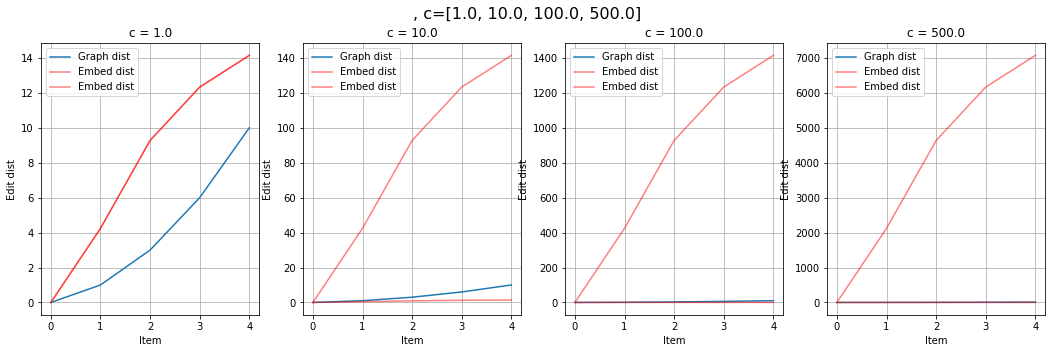

In [4]:
edit_distances, embed_distances = GraphletEmbedsEndToEnd(clicksData,
                                                         nx.algorithms.similarity.graph_edit_distance,
                                                         scipy.spatial.distance.euclidean)

## RER50

In [399]:
RERData = generateRandomEdgeRemoval(d=0)

In [400]:
graph_distances_50, embed_distances_50 = GraphletEmbedsEndToEnd(RERData,
                                                                fastEdgeDistance,
                                                                scipy.spatial.distance.euclidean,
                                                                k = 3,
                                                                title='RER50')

Getting embeddings...
Computing graflets...



Computing embeddings...


KeyboardInterrupt: 

In [ ]:
np.save('rer50_graphlet_gdist', graph_distances_50)
np.save('rer50_graphlet_edist', embed_distances_50)

## ComplicatedClicks50

In [ ]:
CClicksData = generateComplicatedClicks(d=50)

In [ ]:
graph_distances_50, embed_distances_50 = GraphletEmbedsEndToEnd(CClicksData,
                                                                nx.algorithms.similarity.graph_edit_distance,
                                                                scipy.spatial.distance.euclidean,
                                                                k = 4,
                                                                title='CClicks50')

In [ ]:
np.save('complicated_clicks50_graphlet_gdist', graph_distances_50)
np.save('complicated_clicks50_graphlet_edist', embed_distances_50)

## Clicks50

In [396]:
ClicksData = generateClicks(d=50)

Getting embeddings...
Computing graflets...



Computing embeddings...



Getting graph distances...



Getting embed distances...



1: upper bound errs - 0, low bound errs - 49)
10: upper bound errs - 0, low bound errs - 49)
100: upper bound errs - 0, low bound errs - 0)
500: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [100, 500]


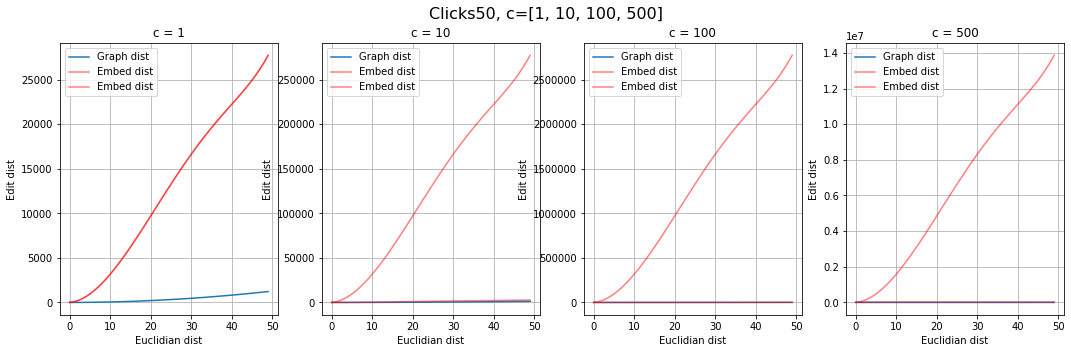

In [397]:
graph_distances_50, embed_distances_50 = GraphletEmbedsEndToEnd(ClicksData,
                                                                fastEdgeDistance,
                                                                scipy.spatial.distance.euclidean,
                                                                k = 3,
                                                                title='Clicks50')

In [398]:
np.save('clicks50_graphlet_gdist', graph_distances_50)
np.save('clicks50_graphlet_edist', embed_distances_50)

## gNMs20

In [ ]:
GNMsData = generateRandomGNMs(d=20, n=10, m=5)
graph_distances_20, embed_distances_20 = GraphletEmbedsEndToEnd(GNMsData,
                                                                nx.algorithms.similarity.graph_edit_distance,
                                                                scipy.spatial.distance.euclidean,
                                                                k = 4,
                                                                title='gNMs20')

In [ ]:
np.save('gnms20_graphlet_gdist', graph_distances_20)
np.save('gnms20_graphlet_edist', embed_distances_20)

# WL embeddings

## Tiny example

In [3]:
clicksData = generateClicks(10)

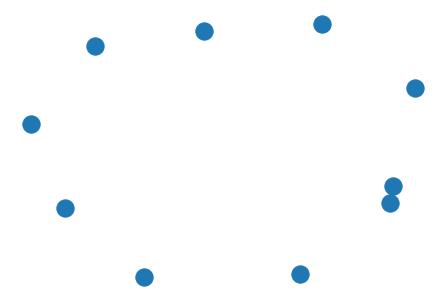

In [4]:
nx.draw(clicksData[1])

In [2]:
from distance_analysis_utils.generation import *
from distance_analysis_utils.embeddings import *
from distance_analysis_utils.analysis import *

## Clicks500

In [10]:
ClicksData = generateClicks(d=500)

Getting embeddings...
Performing iterations...



Dimension is 500
Computing embeddings...



Getting graph distances...



Getting embed distances...



1: upper bound errs - 497, low bound errs - 2)
10: upper bound errs - 471, low bound errs - 0)
100: upper bound errs - 217, low bound errs - 0)
500: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [500.0]
data/WL_Clicks500_gdist


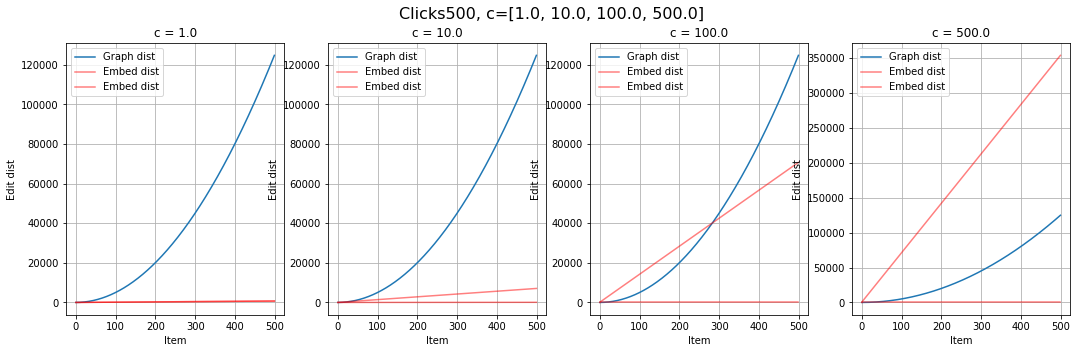

In [11]:
graph_dists, embed_dists = WLEmbedsEndToEnd(ClicksData,
                                            fastEdgeDistance,
                                            scipy.spatial.distance.euclidean,
                                            iterations = 10,
                                            title='Clicks500')
save_results(graph_dists, embed_dists, 'WL', 'Clicks500', 'data')

## RER100

In [12]:
gnmData = generateRandomGNMs(d=5, n=10, m=4)

In [13]:
ge = WLEmbeddings()
ge.compute_embeddings(gnmData, 10)

Performing iterations...



Dimension is 8
Computing embeddings...


[array([0., 4., 2., 2., 0., 0., 2., 0.]),
 array([4., 4., 0., 0., 2., 0., 0., 0.]),
 array([0., 4., 2., 0., 0., 3., 0., 1.]),
 array([0., 4., 2., 2., 0., 0., 2., 0.]),
 array([0., 4., 2., 2., 0., 0., 2., 0.])]

In [7]:
rerData = generateRandomEdgeRemoval(d=30)

In [8]:
ge = WLEmbeddings()
embeds = ge.compute_embeddings(rerData, 10)

Performing iterations...



Dimension is 11726
Computing embeddings...


In [9]:
embeds

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

In [13]:
embeds[100]

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
get_distances(embeds[0], embeds, scipy.spatial.distance.euclidean)

array([ 0.        , 41.08527717, 39.89987469, 38.88444419, 38.05259518,
       37.41657387, 36.98648402, 35.9722115 , 35.58089375, 34.78505426,
       34.46737588, 34.3220046 , 33.82306905, 33.1662479 , 33.13608305,
       32.77193922, 32.40370349, 32.40370349, 32.03123476, 31.78049716,
       31.52776554, 31.52776554, 31.27299154, 31.20897307, 31.01612484,
       31.01612484, 30.98386677, 30.98386677, 30.98386677, 30.98386677,
       30.82207001, 30.82207001, 30.82207001, 30.82207001, 30.85449724,
       30.85449724, 30.72458299, 30.72458299, 30.72458299, 30.59411708,
       30.56141358, 30.56141358, 30.56141358, 30.56141358, 30.56141358,
       30.56141358, 30.56141358, 30.56141358, 30.52867504, 30.52867504,
       30.52867504, 30.52867504, 30.52867504, 30.49590136, 30.49590136,
       30.49590136, 30.49590136, 30.49590136, 30.49590136, 30.49590136,
       30.49590136, 30.49590136, 30.49590136, 30.49590136, 30.49590136,
       30.49590136, 30.49590136, 30.49590136, 30.49590136, 30.49

In [ ]:
rerData = generateRandomEdgeRemoval(d=100)

Exception ignored in: <function tqdm.__del__ at 0x1172cc040>
Traceback (most recent call last):
  File "/Users/dragonstone/opt/anaconda3/envs/graphembeds/lib/python3.8/site-packages/tqdm/std.py", line 1064, in __del__
    def __del__(self):
KeyboardInterrupt: 


Getting embeddings...
Performing iterations...



Dimension is 479281
Computing embeddings...



Getting graph distances...



Getting embed distances...



1: upper bound errs - 4849, low bound errs - 101)
10: upper bound errs - 3946, low bound errs - 12)
100: upper bound errs - 0, low bound errs - 1)
500: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [500.0]
data/WL_RER100_gdist


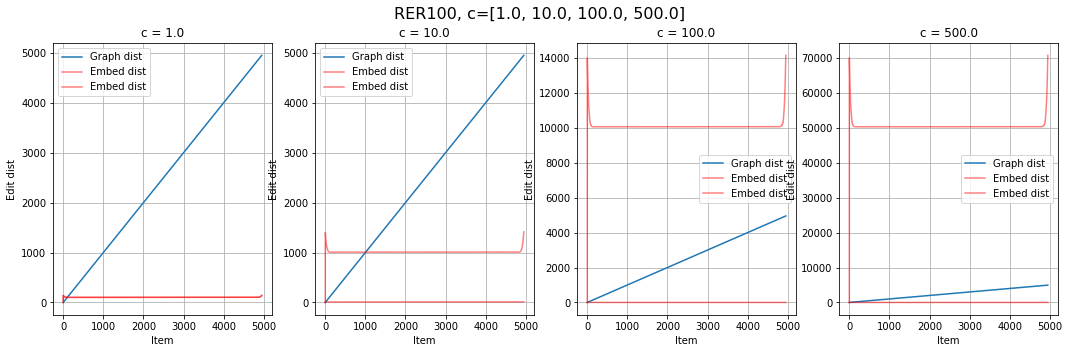

In [3]:
graph_dists, embed_dists = WLEmbedsEndToEnd(rerData,
                                            fastEdgeDistance,
                                            scipy.spatial.distance.euclidean,
                                            iterations = 10,
                                            title='RER100')
save_results(graph_dists, embed_dists, 'WL', 'RER100', 'data')

In [ ]:
gr